Nama : Elviyani Mawarni
NIM : G.231.22.0077

In [6]:
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns

In [33]:
#membaca data dari data review bareksa app store dan play store
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT183TiLIofS-qIzGhEYS-3DixtSHdLuTkGQLpLx4hBihkygIFYVc1MImzBYhHXW6wk-gmwAHV4AwTO/pub?gid=248246508&single=true&output=csv')
data.head()

,review_description,rating,Year,Month,Day,review_descriptiont,content_token,sentiment,stemmed,text_string
0,keren tampilan y,5,2018,2,6,keren tampilan y,"['keren', 'tampilan', 'y']",1,"['keren', 'tampil', 'y']",keren tampil
1,sangat mmpermudah,5,2018,2,7,sangat mmpermudah,['mmpermudah'],1,['mmpermudah'],mmpermudah
2,keren...,5,2018,2,7,keren...,['keren'],1,['keren'],keren
3,"metode pembayarannya di tambah dong, e cash li...",4,2018,2,7,"metode pembayarannya di tambah dong, e cash li...","['metode', 'pembayarannya', 'e', 'cash', 'line...",1,"['metode', 'bayar', 'e', 'cash', 'linepay', 'c...",metode bayar cash linepay cash hilang
4,lebih praktis 😀,5,2018,2,7,lebih praktis 😀,['praktis'],1,['praktis'],praktis


<Axes: xlabel='sentiment'>

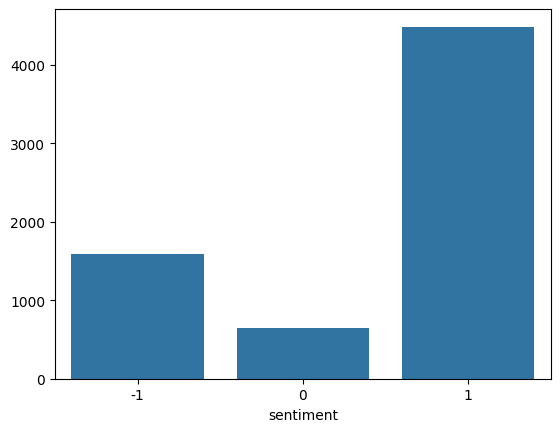

In [34]:
data_review_new = data[['Year', 'Month', 'sentiment']]
result = data_review_new.groupby(['sentiment']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

In [35]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
from sklearn.naive_bayes import MultinomialNB
# Data Visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
X = data['text_string']
y = data['sentiment']

# Handle missing values in 'text_string' column
X = X.fillna('')  # Replace missing values with empty strings

tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [37]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
#Data train 70 data test 30
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

In [32]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7392919039366179